 # <centre > <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Skin Cancer Classification using Transfer Learning </p>
 <font color = '#ffffff'> <centre>

![shutterstock_1493059916-2048x1447.jpg](https://www.curemelanoma.org/assets/Uploads/_resampled/ScaleWidthWyI4MDAiXQ/AI-in-Melanoma-2.png)
[Image source](https://www.curemelanoma.org/blog/article/artificial-intelligence-and-melanoma-detection-closing-the-gaps)

# Introduction

<b> Description: </b> 

Skin cancer is a significant global health concern, affecting <b> millions of people each year </b>. Early detection and accurate diagnosis are crucial for successful treatment and improved patient outcomes. This project aims to develop <b> a deep learning model for skin cancer classification using transfer learning </b>, a technique that leverages the power of<b>  pre-trained models </b>to achieve accurate results with limited training data.

DeepSkin Detect is an innovative deep learning project designed to develop a robust and accurate <b> skin cancer classification</b>  system capable of distinguishing between malignant and benign skin lesions. Early and precise diagnosis is vital for successful treatment and improved patient outcomes. Leveraging the power of deep learning models, this project aims to contribute to the advancement of medical diagnostics by assisting healthcare professionals in identifying skin cancer accurately.

The project will utilize a state-of-the-art convolutional neural network (CNN) architecture, pre-trained on a large dataset (e.g., ImageNet), which has learned rich feature representations from general images. By transferring this knowledge to our specific task of skin cancer classification, we can benefit from the network's ability to recognize patterns and features in images effectively

I. Project Overview
A. Introduction to Skin Cancer
B. Significance of Early Detection
C. Motivation for DeepSkin



<font color = '#EC5C3C'>


Content:

1. [Importing the Essential Packages 📚](#1)
2. [Function Creation 🛠️](#2)    
3. [Model Bulding 🧱](#3)<br>
    3.1  [CNN model (Model 1) 📃](#3.1)<br>
    3.2  [Transfer Learning Model : Xception (Model 2 ) 📃](#3.2)
4. [Models comparison 📝](#4)
5. [Conclusion](#5)


 <a id = '1'></a><br>
 # <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">📚 1. Importing the Essential Packages 📚 </p>
 <font color = '#ffffff'>


In [206]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.applications import Xception
from keras.applications.xception import Xception
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import shutil
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
import cv2
from keras.optimizers import Adamax
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.losses import BinaryCrossentropy
print ('Modules loaded with success 👍')

Modules loaded with success 👍


<a id = '2'></a><br>
# <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">🛠️ 2. Function Creation    🛠️</p>
 <font color = '#ffffff'>


#### Function to create data frame

In [3]:
# Define source directories
benign_dir = 'C:\\Users\\\\\\moete\\\\\OneDrive\\\\Bureau\\\skin cancer detection\\data\\train\\benign\\'
malignant_dir = 'C:\\Users\\\\\\moete\\\\\OneDrive\\\\Bureau\\\skin cancer detection\\data\\train\\malignant\\'

# Define destination directories
base_dir = '/kaggle/working/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create train and validation directories
for dir in [train_dir, validation_dir]:
    for img_class in ['benign', 'malignant']:
        os.makedirs(os.path.join(dir, img_class), exist_ok=True)



In [4]:
test_dir = 'C:\\Users\\\\\\moete\\\\\OneDrive\\\\Bureau\\\skin cancer detection\\data\\test\\'


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 2637 images belonging to 2 classes.
Found 2413 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


### Modeling Functions

In [6]:
def split_data(source, train, validation, train_split, valid_split):
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_length = int(len(files) * train_split)
    valid_length = int(len(files) * valid_split)
    
    shuffled_set = np.random.permutation(files)
    
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:(training_length + valid_length)]
    
    for filename in training_set:
        this_file = source + filename
        destination = train + filename
        shutil.copyfile(this_file, destination)

    for filename in valid_set:
        this_file = source + filename
        destination = validation + filename
        shutil.copyfile(this_file, destination)
        
# Call function to split data
train_split = .8  # 80% training data
valid_split = 1 - train_split  # remaining % as validation data
split_data(benign_dir, train_dir + "/benign/", validation_dir + "/benign/", train_split, valid_split)
split_data(malignant_dir, train_dir + "/malignant/", validation_dir + "/malignant/",  train_split, valid_split)

In [7]:
def show_history(history):
    hist_df = pd.DataFrame(history.history)
    hist_df\
      .loc[:, ['accuracy', 'val_accuracy']]\
      .plot( 
        figsize = (12, 6), 
        grid = True, 
        #ylim = 0, 
        ylabel = 'accuracy',
        xlabel = 'epoch'
    )
    plt.show()
    
    hist_df\
      .loc[:, ['loss', 'val_loss']]\
      .plot(
            figsize = (12, 6), 
            grid = True, 
            #ylim = 0, 
            ylabel = 'loss',
            xlabel = 'epoch'
    )
    plt.show()

In [45]:
def evaluate_model(model, generator):
    # Get the true labels
    y_true = generator.classes

    # Make predictions
    y_pred = model.predict(generator)
    y_pred = np.round(y_pred).astype(int)  # convert probabilities to class labels

    # Generate and print the classification report
    report = classification_report(y_true, y_pred, target_names=generator.class_indices.keys())
    
    print(report)

    # Generate and print the confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    print(matrix)
    sns.heatmap(matrix, annot=True)
    

In [69]:
def evaluate_models(model, generator):
    # Get the true labels
    y_true = generator.classes

    # Make predictions
    y_pred = model.predict(generator)
    y_pred = np.round(y_pred).astype(int)  # convert probabilities to class labels

    # Generate and print the classification report
    report = classification_report(y_true, y_pred, target_names=generator.class_indices.keys(),output_dict=True)
    rap_model1 = pd.DataFrame(report).T
    
    return(rap_model1)

    

In [54]:
def compare_model(model, generator):
    # Get the true labels
    y_true = generator.classes

    # Make predictions
    y_pred = model.predict(generator)
    y_pred = np.round(y_pred).astype(int)  # convert probabilities to class labels

    # Generate and print the classification report
    report = classification_report(y_true, y_pred, target_names=generator.class_indices.keys())
    

    # Generate and print the confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    
    df_model1 = pd.DataFrame.from_dict(report, orient ='index').transpose() 

In [9]:
def plot_training_curves(history):
    
    loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])

    accuracy = np.array(history.history['accuracy'])
    val_accuracy = np.array(history.history['val_accuracy'])

    epochs = range(len(history.history['loss']))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot loss
    ax1.plot(epochs, loss, label='training_loss', marker='o')
    ax1.plot(epochs, val_loss, label='val_loss', marker='o')
    
    ax1.fill_between(epochs, loss, val_loss, where=(loss > val_loss), color='C0', alpha=0.3, interpolate=True)
    ax1.fill_between(epochs, loss, val_loss, where=(loss < val_loss), color='C1', alpha=0.3, interpolate=True)

    ax1.set_title('Loss (Lower Means Better)', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.legend()

    # Plot accuracy
    ax2.plot(epochs, accuracy, label='training_accuracy', marker='o')
    ax2.plot(epochs, val_accuracy, label='val_accuracy', marker='o')
    
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy > val_accuracy), color='C0', alpha=0.3, interpolate=True)
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy < val_accuracy), color='C1', alpha=0.3, interpolate=True)

    ax2.set_title('Accuracy (Higher Means Better)', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.legend();

<a id = '3'></a><br>
# <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">🧱  3. Model Bulding 🧱 </p>
 <font color = '#ffffff'>

<a id = '3.1'></a><br>
### <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-baby-blue-eyes-solid-color-background.jpg);font-family:system-ui;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">📃 3.1 CNN model (Model 1) 📃</p>
 <font color = '#ffffff'>

 


In [10]:
train_datagen_aug = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
)


train_generator_aug = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary'
)

Found 2637 images belonging to 2 classes.


In [12]:
modelCnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.15),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
modelCnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 128)      

### Train the CNN model

In [13]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=1),
             ModelCheckpoint(filepath='best_model2.h5', monitor='val_loss', save_best_only=True)]


modelCnn.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

historycnn = modelCnn.fit(
    train_generator_aug,
    epochs=60,
    validation_data=validation_generator,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/60
2637/2637 [==============================] - 306s 116ms/step - loss: 0.5732 - accuracy: 0.7217 - val_loss: 0.4985 - val_accuracy: 0.7878
Epoch 2/60
   1/2637 [..............................] - ETA: 4:46 - loss: 0.1893 - accuracy: 1.0000

C:\Users\moete\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2637/2637 [==============================] - 290s 110ms/step - loss: 0.5130 - accuracy: 0.7747 - val_loss: 0.4052 - val_accuracy: 0.8073
Epoch 3/60
2637/2637 [==============================] - 278s 106ms/step - loss: 0.5192 - accuracy: 0.7850 - val_loss: 0.4630 - val_accuracy: 0.7845
Epoch 4/60
2637/2637 [==============================] - 281s 107ms/step - loss: 0.5235 - accuracy: 0.7956 - val_loss: 0.4536 - val_accuracy: 0.7961
Epoch 5/60
2637/2637 [==============================] - 280s 106ms/step - loss: 0.5253 - accuracy: 0.7846 - val_loss: 0.4276 - val_accuracy: 0.7712
Epoch 6/60
2637/2637 [==============================] - 271s 103ms/step - loss: 0.5798 - accuracy: 0.7892 - val_loss: 0.5071 - val_accuracy: 0.7899
Epoch 7/60
2637/2637 [==============================] - 275s 104ms/step - loss: 0.5444 - accuracy: 0.7933 - val_loss: 0.4209 - val_accuracy: 0.8135
Epoch 8/60
2637/2637 [==============================] - 270s 103ms/step - loss: 0.5405 - accuracy: 0.8024 - val_loss: 0.434

OSError: No file or directory found at modelCnn.h5

In [202]:
modelCnn = load_model('best_model2.h5')

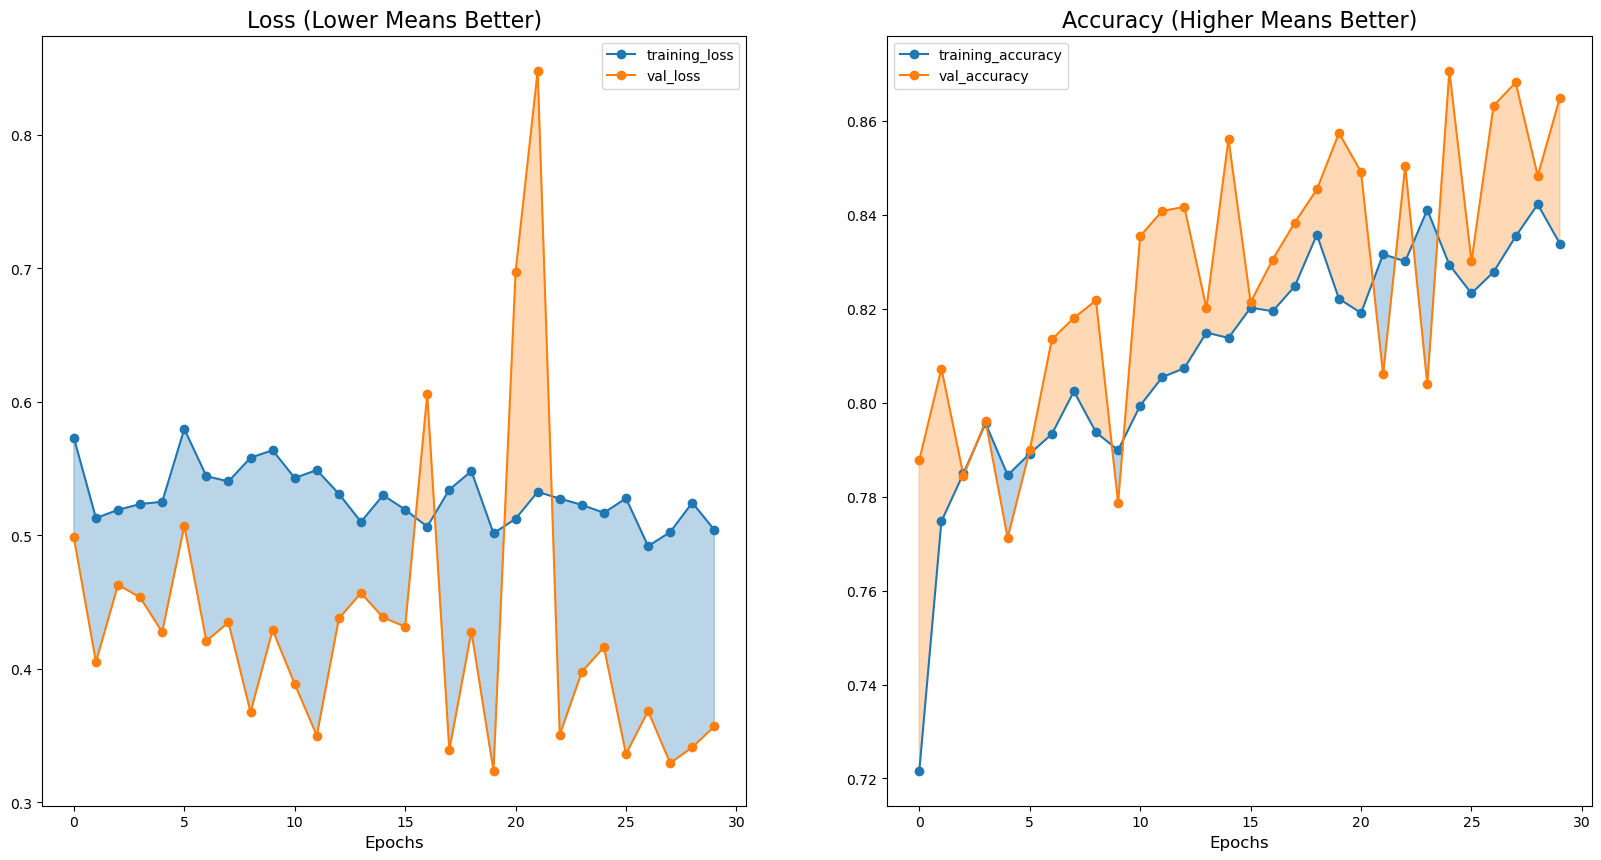

In [17]:
plot_training_curves(historycnn)

In [18]:
results = modelCnn.evaluate(validation_generator)
print("validation loss, validation acc:", results)

results = modelCnn.evaluate(test_generator)
print("test loss, test acc:", results)

2413/2413 [==============================] - 45s 19ms/step - loss: 0.3238 - accuracy: 0.8574
validation loss, validation acc: [0.32376033067703247, 0.857438862323761]
660/660 [==============================] - 15s 22ms/step - loss: 0.4157 - accuracy: 0.8258
test loss, test acc: [0.4157102704048157, 0.8257575631141663]


660/660 [==============================] - 11s 17ms/step
              precision    recall  f1-score   support

      benign       0.85      0.82      0.84       360
   malignant       0.80      0.83      0.81       300

    accuracy                           0.83       660
   macro avg       0.82      0.83      0.82       660
weighted avg       0.83      0.83      0.83       660

[[297  63]
 [ 52 248]]


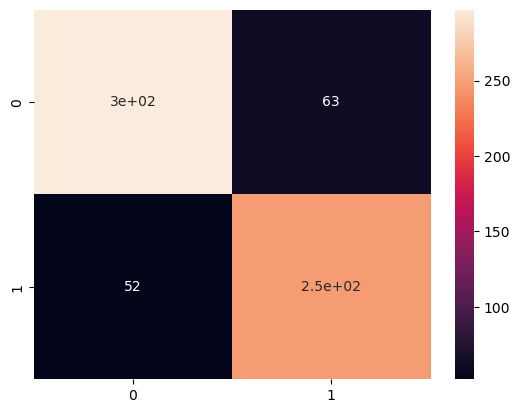

In [20]:
evaluate_model(modelCnn, test_generator)


<a id = '3.2'></a><br>
### <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-baby-blue-eyes-solid-color-background.jpg);font-family:system-ui;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">📃 3.2  Transfer Learning Model : Xception (Model 2 ) 📃 </p>
 <font color = '#ffffff'>  

An inception network is a deep neural network (DNN) with a design that consists of repeating modules referred to as inception modules.

The name Inceptions probably sounds familiar to some readers, especially if you are a fan of the actor Leonardo DiCaprio or movie director, Christopher Nolan.
Inception (directed by Christopher Nolan) is a movie released in 2010, and the concepts of embedded dream state were the central premise of the film. This is where the name of the model was taken from.

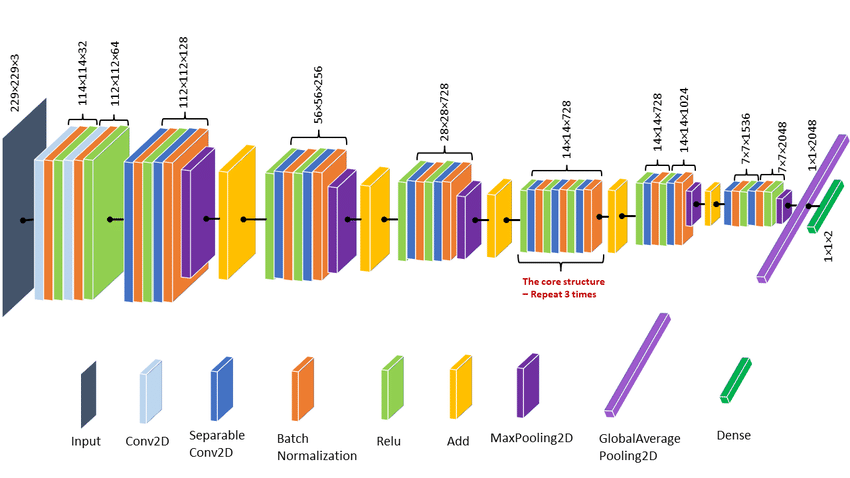


**For more information follow the links below:**



> ●[Image Classification With Xception Model](https://medium.com/@nutanbhogendrasharma/image-classification-with-xception-model-e8094a9de4d2) 

> ●[Xception Explained](https://paperswithcode.com/method/xception)

> ●[Xception](https://keras.io/api/applications/xception/)

> ●[Inception Network](https://iq.opengenus.org/xception-model/)

### Define Xception Model

In [21]:
from keras import applications
base_model= applications.xception.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [24]:
# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Create new model on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x) 
modelxception = Model(inputs=base_model.input, outputs=output)
# Compile the model
modelxception.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# Generate Summary of the Model
modelxception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

### Train Xception Model



In [27]:
# Define Early Stopping Callback
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
             ModelCheckpoint(filepath='best_mode3.h5', monitor='val_loss', save_best_only=True)]

history6 = model6.fit(
    train_generator_aug, 
    validation_data=validation_generator, 
    epochs=20, 
    callbacks=callbacks
)
model6 = load_model('best_model3.h5')

Epoch 1/20
2637/2637 [==============================] - ETA: 0s - loss: 0.4374 - accuracy: 0.7865

C:\Users\moete\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2637/2637 [==============================] - 638s 242ms/step - loss: 0.4374 - accuracy: 0.7865 - val_loss: 0.3229 - val_accuracy: 0.8496
Epoch 2/20
2637/2637 [==============================] - 645s 245ms/step - loss: 0.4041 - accuracy: 0.8115 - val_loss: 0.3012 - val_accuracy: 0.8591
Epoch 3/20
2637/2637 [==============================] - 660s 250ms/step - loss: 0.3722 - accuracy: 0.8294 - val_loss: 0.2797 - val_accuracy: 0.8835
Epoch 4/20
2637/2637 [==============================] - 643s 244ms/step - loss: 0.3401 - accuracy: 0.8498 - val_loss: 0.2439 - val_accuracy: 0.8968
Epoch 5/20
2637/2637 [==============================] - 642s 243ms/step - loss: 0.3414 - accuracy: 0.8483 - val_loss: 0.2577 - val_accuracy: 0.8856
Epoch 6/20
2637/2637 [==============================] - 645s 245ms/step - loss: 0.3222 - accuracy: 0.8627 - val_loss: 0.2136 - val_accuracy: 0.9105
Epoch 7/20
2637/2637 [==============================] - 641s 243ms/step - loss: 0.2880 - accuracy: 0.8733 - val_loss: 0.222

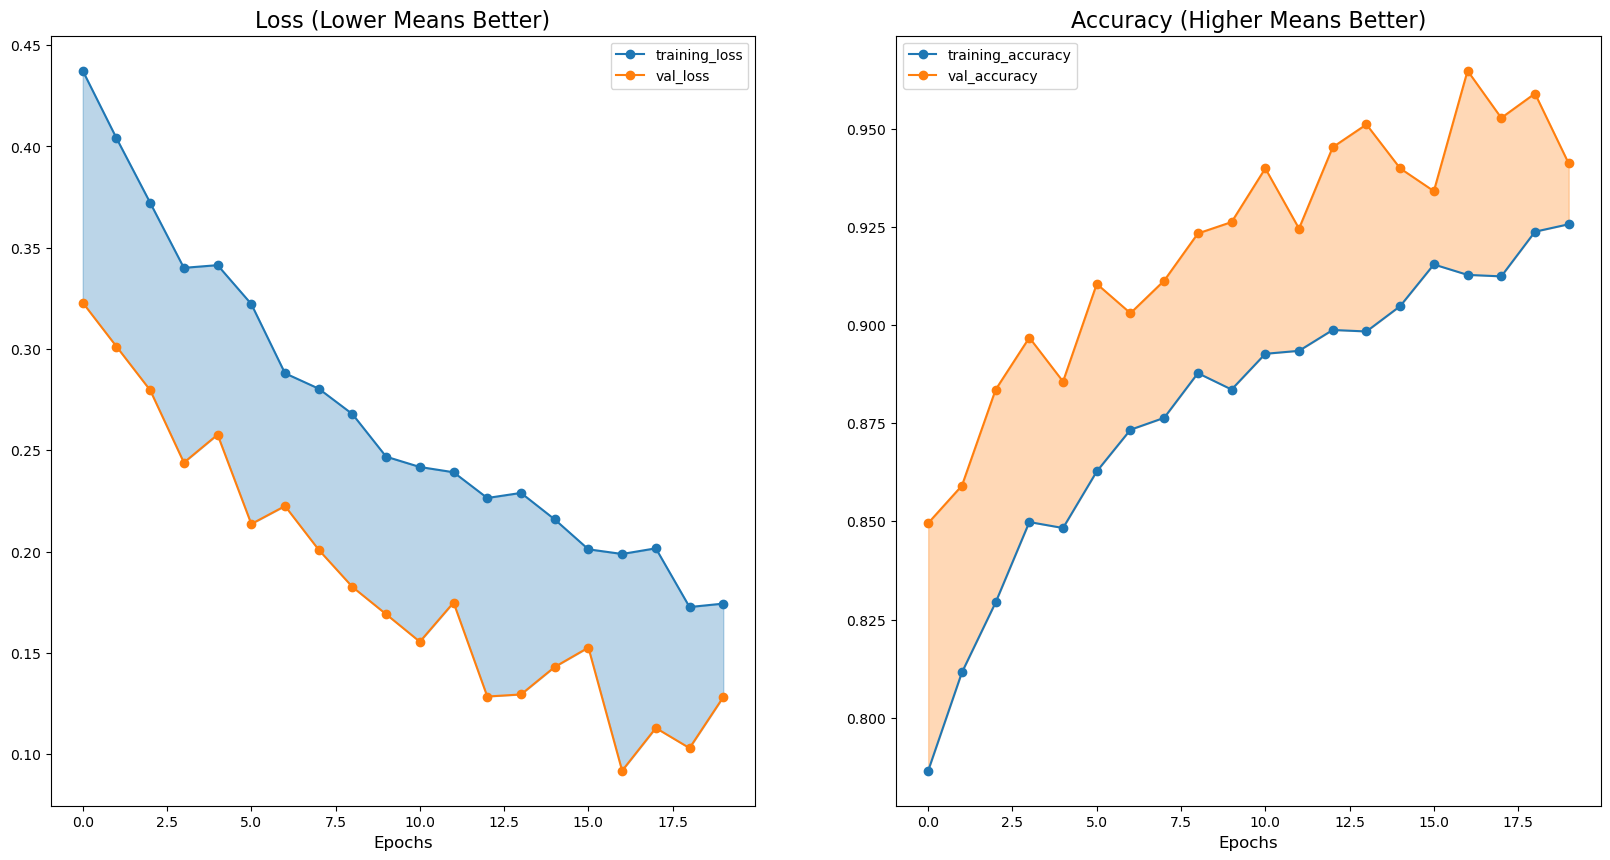

In [28]:
plot_training_curves(history6)

In [32]:
results = model6.evaluate(validation_generator)
print("validation loss, validation acc:", results)

results = model6.evaluate(test_generator)
print("test loss, test acc:", results)

2413/2413 [==============================] - 637s 264ms/step - loss: 0.3590 - accuracy: 0.8417
validation loss, validation acc: [0.35903555154800415, 0.8416908383369446]
660/660 [==============================] - 170s 258ms/step - loss: 0.3583 - accuracy: 0.8333
test loss, test acc: [0.3583229184150696, 0.8333333134651184]


660/660 [==============================] - 160s 243ms/step
              precision    recall  f1-score   support

      benign       0.86      0.83      0.84       360
   malignant       0.80      0.84      0.82       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660

[[299  61]
 [ 49 251]]


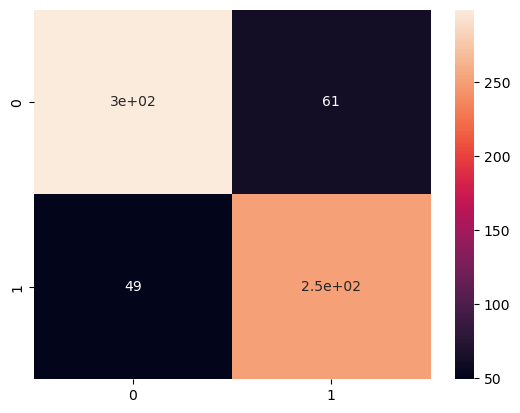

In [33]:
# Evaluate the model
evaluate_model(model6, test_generator)

<a id = '4'></a><br>
 # <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:system-ui;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">📝 4. Models comparison 📝 </p>
 <font color = '#ffffff'> 


In [71]:
evaluate_models(modelCnn, test_generator)

660/660 [==============================] - 11s 17ms/step


,precision,recall,f1-score,support
benign,0.851003,0.825000,0.837800,360.000000
malignant,0.797428,0.826667,0.811784,300.000000
accuracy,0.825758,0.825758,0.825758,0.825758
macro avg,0.824215,0.825833,0.824792,660.000000
weighted avg,0.826650,0.825758,0.825974,660.000000


In [70]:
evaluate_models(model6, test_generator)

660/660 [==============================] - 163s 247ms/step


,precision,recall,f1-score,support
benign,0.859195,0.830556,0.844633,360.000000
malignant,0.804487,0.836667,0.820261,300.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.831841,0.833611,0.832447,660.000000
weighted avg,0.834328,0.833333,0.833555,660.000000


In [73]:
modelcnn_raport = evaluate_models(modelCnn, test_generator)


660/660 [==============================] - 11s 17ms/step


In [76]:
modelXception_raport=evaluate_models(model6, test_generator)

660/660 [==============================] - 162s 246ms/step


In [153]:
df4 = pd.concat([modelcnn_raport,modelXception_raport], ignore_index=False,keys=['CNN_Model', 'Xception_Model'],axis=1)
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#C41438"),
              ("border", "3px solid white"),
              ("font-size", "2rem"), ("font-style", "italic")]
    
}
index_names = {
    "selector":"th.row_heading",
    "props": [("background-color", "#C41438"), ("color", "white"),
              ("border", "3px solid white"),
              ("font-size", "2rem"), ("font-style", "italic")]
}
headers = {
    "selector": "th:not(.index_name)",
    "props": [("background-color", "#C41438"), ("color", "white"),
              ("border", "3px solid white"),
              ("font-size", "2rem"), ("font-style", "italic")]
}
properties = {"border": "1px solid black", "width": "65px", "text-align": "center"}
df4.style.set_table_styles([cell_hover, index_names, headers]).set_properties(**properties)

#### Extract the accuracy

In [213]:
cnn_acc_f1= df4.iloc[2][('CNN_Model', 'f1-score')]
xcept_acc_f1=df4.iloc[2][('Xception_Model', 'f1-score')]
d = {'CNN_Model': cnn_acc_f1, 'Xception_Model': xcept_acc_f1}
comp = pd.DataFrame(data=d,index=['accuracy'] )
comp

,CNN_Model,Xception_Model
accuracy,0.825758,0.833333


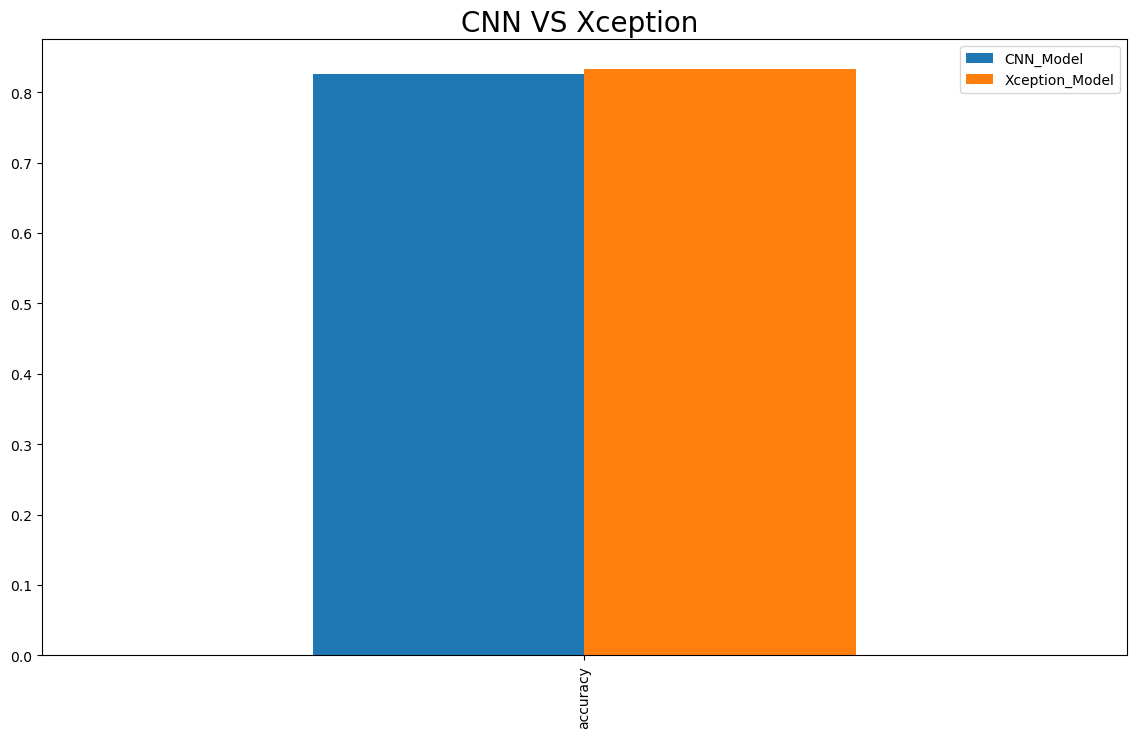

In [216]:
comp.plot(kind="bar", figsize=(14, 8))
plt.title('CNN VS Xception ', fontsize=20);

#### Prediction using loaded_model

In [217]:
loaded_model = tf.keras.models.load_model('C:\\Users\\moete\\OneDrive\\Bureau\\skin cancer detection\\data\\best_mode3.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [218]:
image_path = 'C:\\Users\\\\\\moete\\\\\OneDrive\\\\Bureau\\\skin cancer detection\\data\\test\\benign\\1023.jpg'
image = Image.open(image_path)
# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Benign', 'Malignant']
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 1s 746ms/step
Benign


##### Save the results to Excel  and CSV format 

In [215]:
styled_df = df4.style.set_table_styles([cell_hover, index_names, headers]).set_properties(**properties)
output_file = 'styled_dataframe.xlsx'
styled_df.to_excel(output_file, index=True)
output_file2 = 'compar_dataframe.xlsx'
comp.to_excel(output_file2, index=True)

In [184]:
df4.to_csv(r'C:\Users\moete\OneDrive\Bureau\skin cancer detection\data\classification_report.csv', index=False, header=True)
comp.to_csv(r'C:\Users\moete\OneDrive\Bureau\skin cancer detection\data\accur_models.csv', index=False, header=True)

<a id = '5'></a><br>
# <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:system-ui;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">   Conclusion </p>
 <font color = '#ffffff'>
 

In this notebook, we delved into the classification of <b> Skin Cancer using Convolutional Neural Networks (CNNs)</b> and explored Transfer Learning models like <b>Xception</b>. By leveraging pretrained models, we were able to create models that demonstrated superior performance compared to the baseline CNN model utilized in this study


The primary objective is to ascertain whether a skin cancer tumor is <b>benign or malignant</b> . It is crucial to emphasize that any model trained for this purpose must achieve a significantly <b> high accuracy score</b>. The decisions made by healthcare professionals handling skin cancer patients will be significantly impacted by the predictions of this model.

# <p style="background-image: url(https://www.solidbackgrounds.com/images/950x350/950x350-asparagus-solid-color-background.jpg);font-family:Gill Sans Extrabold;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Thank you for your attention 🙏 
</p>
 <font color = '#ffffff'>

<p style="font-size:140%;font-family:verdana;text-align:center;font-style:none;">You can follow me in <a href="https://github.com/MoetezRadhouani">GitHub</a>|<a href="https://www.linkedin.com/in/mootez-radhouani/">Linkedin</a>|<a href="https://www.kaggle.com/radhouanimoetez">Kaggle</a> </p> 



<br><center><img src='https://www.gifcen.com/wp-content/uploads/2023/05/the-end-gif-3.gif' height=80px width=300px></center><br>